                                       Yuhai Li

# Build a disordered atomic configuration

* Insert randomly some atoms in a cubic box with a size L = 10 Å with periodic boundary conditions. Each atom has a diameter of 1 Å.
* Ensure that atoms do not overlap when being randomly placed (be careful with the periodic boundary conditions).
* What is the maximum number of atoms that can be placed?
* Plot the final configuration (positions x, y of all the atoms) that is obtained.

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [125]:
def plot(x, y, title, xlabel, ylabel):
    plt.scatter(x, y)
    plt.plot(x, y)
    plt.title(title)
    plt.xticks(x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [48]:
class Atom:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self._radius = 0.5
        
    def euclideanDistance(self, pos, L):
        x = min(abs(self.x - pos[0]), L - abs(self.x - pos[0]))
        y = min(abs(self.y - pos[1]), L - abs(self.y - pos[1]))
        return np.sqrt(x**2 + y**2)
    
    def overlapTo(self, pos, L):
        if self.euclideanDistance(pos, L) < self._radius * 2:
            return True
        else:
            return False
    
    def LJpotential(self, atom, L):
        r = self.euclideanDistance(atom.getOrigin(), L)
        return 4 * ((1/r)**12 - (1/r)**6)
    
    def getOrigin(self):
        return (self.x, self.y)
    
    def getRadius(self):
        return self._radius

In [118]:
class Simulator:
    
    def __init__(self, L):
        self._size = L
        self._xRange = [0, L]
        self._yRange = [0, L]
        self._atomList = []
        self._energy = 0
        self._n = 0
    
    def calculateEnergy(self, cutoff = None):
        self._energy = 0
        for i in range(len(self._atomList)):
            for j in range(i + 1, len(self._atomList)):
                if cutoff is None or self._atomList[i].euclideanDistance(self._atomList[j].getOrigin(), self._size) < cutoff:
                    self._energy = self._energy + self._atomList[i].LJpotential(self._atomList[j], self._size)
        return self._energy
    
    def simulate(self, num):
        self._atomList = []
        res = 0
        count = 0
        while(res < num and count < 10000):
            pos = [random.uniform(self._xRange[0], self._xRange[1]), random.uniform(self._yRange[0], self._yRange[1])]
            if(self._canPlace(pos)):
                self._atomList.append(Atom(pos[0], pos[1]))
                count = 0
                res = res + 1
            else:
                count = count + 1
#         self._calculateEnergy()
        self._n = res
    
    def _canPlace(self, pos):
        for atom in self._atomList:
            if atom.overlapTo(pos, self._size):
                return False
        return True
    
    def setSize(self, L):
        self._size = L
        
    def getAtomList(self):
        return self._atomList
    
    def getAtomNumber(self):
        return self._n
    
    def getEnergy(self):
        return self._energy
    
    def getSize(self):
        return self._size
    
    def plot(self):
        fig, ax = plt.subplots()
        for atom in self._atomList:
            origin = atom.getOrigin()
            circle = plt.Circle(origin, atom.getRadius(), color='r')
            ax.add_artist(circle)
            if origin[0] - self._xRange[0] < atom.getRadius() and origin[1] - self._yRange[0] < atom.getRadius():
                circle = plt.Circle((origin[0] + self._size, origin[1] + self._size), atom.getRadius(), color='r')
                ax.add_artist(circle)
            elif origin[0] - self._xRange[0] < atom.getRadius():
                circle = plt.Circle((origin[0] + self._size, origin[1]), atom.getRadius(), color='r')
                ax.add_artist(circle)
            elif origin[1] - self._yRange[0] < atom.getRadius():
                circle = plt.Circle((origin[0], origin[1] + self._size), atom.getRadius(), color='r')
                ax.add_artist(circle)
            
            if self._xRange[1] - origin[0] < atom.getRadius() and self._yRange[1] - origin[1] < atom.getRadius():
                circle = plt.Circle((origin[0] - self._size, origin[1] - self._size), atom.getRadius(), color='r')
                ax.add_artist(circle)
            elif self._xRange[1] - origin[0] < atom.getRadius():
                circle = plt.Circle((origin[0] - self._size, origin[1]), atom.getRadius(), color='r')
                ax.add_artist(circle)
            elif self._yRange[1] - origin[1] < atom.getRadius():
                circle = plt.Circle((origin[0], origin[1] - self._size), atom.getRadius(), color='r')
                ax.add_artist(circle)
        ax.set_xlim((0, self._size))
        ax.set_ylim((0, self._size))
        plt.show()

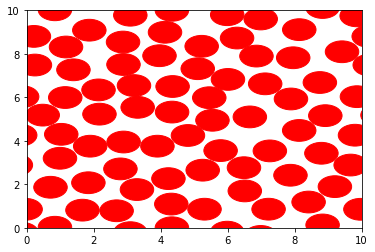

The maximum number of atoms that can be placed is 69


In [119]:
simulator = Simulator(10)
simulator.simulate(200)
simulator.plot()
print("The maximum number of atoms that can be placed is", simulator.getAtomNumber())

# Influence of distance cutoff

* The atoms are interacting with a Lennard-Jones potential with ε = 1 eV and σ = 1 Å.
* Calculate the energy per atom (total energy divided by the number of atoms) taking into account periodic boundary conditions.
* Calculate the energy per atom while adopting varying distance cutoffs. Plot the energy per atom as a function of the cutoff. Conclude of the optimal choice of cutoff.

In [120]:
print("The energy per atom is", simulator.calculateEnergy() / simulator.getAtomNumber())

The energy per atom is -1.8406288395997537


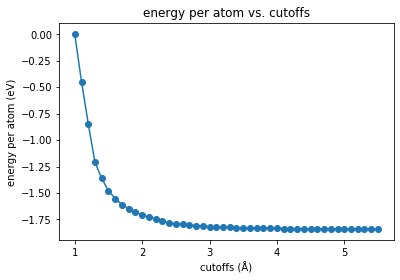

In [121]:
n = simulator.getAtomNumber()
cutoffs = [_/10 for _ in range(10, 56)]
energy = [simulator.calculateEnergy(c)/n for c in cutoffs]
plot(cutoffs, energy, "energy per atom vs. cutoffs", "cutoffs (Å)", "energy per atom (eV)")

It looks that the cutoff around 3Å is good to reduce the computational complexity with reasonable results.

# Influence of packing density

* Vary the number of atoms being randomly placed in the cubic box.
* Plot the total energy and the energy per atom as a function of the atomic density (number of atoms per unit of volume).

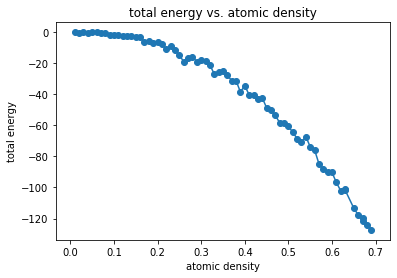

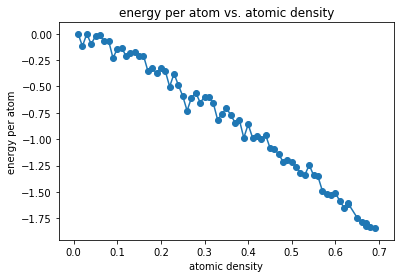

In [123]:
density = []
total_energy = []
energy_per_atom = []
for i in range(1, 71):
    simulator.simulate(i)
    density.append(simulator.getAtomNumber() / simulator.getSize()**2)
    total_energy.append(simulator.calculateEnergy())
    energy_per_atom.append(simulator.getEnergy() / simulator.getAtomNumber())
plot(density, total_energy, "total energy vs. atomic density", "atomic density", "total energy")
plot(density, energy_per_atom, "energy per atom vs. atomic density", "atomic density", "energy per atom")

# Influence of system size

* Repeat the simulation in section (1) for different box sizes L.
* Plot the maximum number of atoms and the maximum density of atoms as a function of the system size.
* Plot the final energy per atom as a function of the system size. Conclude on the optimal system size to choose

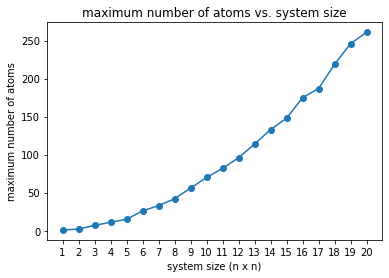

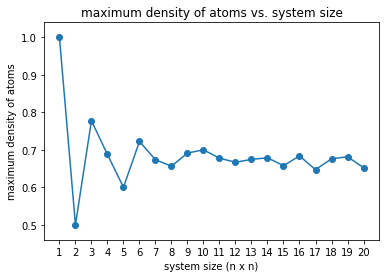

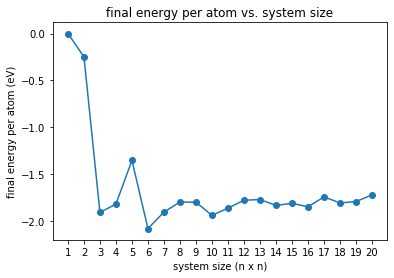

In [129]:
L = [_ for _ in range(1, 21)]
max_atom_num = []
max_atom_den = []
energy_per_atom = []
for l in L:
    simulator = Simulator(l)
    simulator.simulate(100000)
    n = simulator.getAtomNumber()
    max_atom_num.append(n)
    max_atom_den.append(n / simulator.getSize()**2)
    energy_per_atom.append(simulator.calculateEnergy() / n)
plot(L, max_atom_num, "maximum number of atoms vs. system size", "system size (n x n)", "maximum number of atoms")
plot(L, max_atom_den, "maximum density of atoms vs. system size", "system size (n x n)", "maximum density of atoms")
plot(L, energy_per_atom, "final energy per atom vs. system size", "system size (n x n)", "final energy per atom (eV)")

Form the above graphs, we are able to see that the maximum density of atoms converages to the range [0.65, 0.7] when the size is greater than or equals to 9. Furthermore, the final energy per atom also converages when the size of system is greater than 8. After doing tradeoff between computational complesity and accuracy, it seems that 9 and 10 should be the optimal size of system.